# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=30)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=30)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

30

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [76]:
api_key= weather_api_key
#http://api.openweathermap.org/data/2.5/weather?q=perth&appid=492b9445638dbc8db4d069c287d3d222

# base_url = "api.openweathermap.org/data/2.5/weather"
# query_url = f"{base_url}?q={city}&units=metric&appid={api_key}"
# city="perth"
# cities=["Perth", "London", "Houston", "Madrid","pretend", "pretend"]
# query_url




In [70]:
response

{'coord': {'lon': 19.23, 'lat': -34.42},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 7.78,
  'feels_like': 4.86,
  'temp_min': 7.78,
  'temp_max': 7.78,
  'pressure': 1025,
  'humidity': 85},
 'wind': {'speed': 2.68, 'deg': 257, 'gust': 6.71},
 'rain': {'1h': 0.52},
 'clouds': {'all': 90},
 'dt': 1594707164,
 'sys': {'type': 3,
  'id': 2006131,
  'country': 'ZA',
  'sunrise': 1594705638,
  'sunset': 1594741813},
 'timezone': 7200,
 'id': 3366880,
 'name': 'Hermanus',
 'cod': 200}

In [14]:
api_key= weather_api_key
country=[]
temp=[]
temp_min=[]
temp_max=[]
humidity=[]
cloudiness=[]
windspeed=[]
city_list=[]
long=[]
lat=[]
record=0
date=[]


base_url = "http://api.openweathermap.org/data/2.5/weather"
#query_url = f"{base_url}?q={city}&units=metric&appid={api_key}"

#query_url =base_url+cityname
#for city in cities:
#response = requests.get(query_url).json()
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    try:
        query_url =(f"{base_url}?q={city}&units=metric&appid={api_key}")
        response = requests.get(query_url).json()
        city_list.append(response["name"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        temp.append(response["main"]["temp"])
        temp_min.append(response["main"]["temp_min"])
        temp_max.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        
        record=record+1
        
        print(f"Processing Record {record} | {city}")  
        
    
    except:
        print(f"Couldn't find {city}... skipping")
    



Beginning Data Retrieval
-----------------------------
Processing Record 1 | [kruisfontein
Processing Record 2 | [ponta do sol
Processing Record 3 | [grenfell
Processing Record 4 | [lebu
Processing Record 5 | [butaritari
Processing Record 6 | [coquimbo
Processing Record 7 | [puerto ayora
Processing Record 8 | [rikitea
Processing Record 9 | [bethanien
Processing Record 10 | [hobart
Processing Record 11 | [boddam
Processing Record 12 | [bambous virieux
Couldn't find samusu... skipping
Processing Record 13 | [busselton
Processing Record 14 | [college
Processing Record 15 | [bubaque
Processing Record 16 | [mataura
Processing Record 17 | [jamestown
Processing Record 18 | [nerchinskiy zavod
Processing Record 19 | [margate
Processing Record 20 | [brae
Processing Record 21 | [portland
Processing Record 22 | [ushuaia
Processing Record 23 | [tuktoyaktuk
Processing Record 24 | [avarua
Processing Record 25 | [aykhal
Processing Record 26 | [turayf
Couldn't find safwah... skipping
Processing Record 

In [85]:
query_url =(f"{base_url}?q={city}&units=metric&appid={api_key}")
response = requests.get(query_url).json()
response["coord"]['lat']

-33.87

In [5]:
windspeed

[7.7, 2.1, 13.4]

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
#ADD LAT LONG DATA AFTER
Weather_data={"City": city_list,
              "Latitude": lat,
              "Longitude": long,
              "Country": country, 
              "Temperate (°C)": temp, 
              "Min Temp(°C)": temp_min, 
              "Max Temp(°C)": temp_max, 
              "Humidity": humidity,
              "Cloudiness": cloudiness, 
              "windspeed (m/s)": windspeed, 
             "Date":, date}

In [18]:
len(Weather_data["Latitude"])



28

In [22]:
weather_data_df=pd.DataFrame(Weather_data)
weather_data_df
weather_data_df.to_csv(r'..\output_data\test.csv', index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [49]:

weather_df=pd.read_csv('../output_data/test.csv')
weather_df

,City,Latitude,Longitude,Country,Temperate (°C),Min Temp(°C),Max Temp(°C),Humidity,Cloudiness,windspeed
0,Kruisfontein,-34.00,24.73,ZA,8.88,8.88,8.88,77,94,10.48
1,Ponta do Sol,32.67,-17.10,PT,19.00,17.78,20.56,76,3,1.60
2,Grenfell,-33.90,148.17,AU,12.53,12.53,12.53,73,24,3.29
3,Lebu,-37.62,-73.65,CL,8.27,8.27,8.27,77,1,1.57
4,Butaritari,3.07,172.79,KI,27.21,27.21,27.21,78,97,6.01
5,Coquimbo,-29.95,-71.34,CL,8.00,8.00,8.00,100,3,2.10
6,Puerto Ayora,-0.74,-90.35,EC,19.44,19.44,19.44,93,16,3.08
7,Rikitea,-23.12,-134.97,PF,22.66,22.66,22.66,84,100,7.15
8,Bethanien,-26.50,17.16,NaN,4.74,4.74,4.74,86,73,2.44
9,Hobart,-42.88,147.33,AU,9.74,9.00,10.00,76,75,1.50


In [50]:
#  Get the indices of cities that have humidity over 100%.
high_humid=weather_df.loc[weather_df["Humidity"] == 100]
high_humid


,City,Latitude,Longitude,Country,Temperate (°C),Min Temp(°C),Max Temp(°C),Humidity,Cloudiness,windspeed
5,Coquimbo,-29.95,-71.34,CL,8.0,8.0,8.0,100,3,2.1
19,Brae,60.40,-1.35,GB,11.0,11.0,11.0,100,75,6.7


In [52]:
weather_df.drop([5, 19 ])
weather_df.reindex()



,City,Latitude,Longitude,Country,Temperate (°C),Min Temp(°C),Max Temp(°C),Humidity,Cloudiness,windspeed
0,Kruisfontein,-34.00,24.73,ZA,8.88,8.88,8.88,77,94,10.48
1,Ponta do Sol,32.67,-17.10,PT,19.00,17.78,20.56,76,3,1.60
2,Grenfell,-33.90,148.17,AU,12.53,12.53,12.53,73,24,3.29
3,Lebu,-37.62,-73.65,CL,8.27,8.27,8.27,77,1,1.57
4,Butaritari,3.07,172.79,KI,27.21,27.21,27.21,78,97,6.01
5,Coquimbo,-29.95,-71.34,CL,8.00,8.00,8.00,100,3,2.10
6,Puerto Ayora,-0.74,-90.35,EC,19.44,19.44,19.44,93,16,3.08
7,Rikitea,-23.12,-134.97,PF,22.66,22.66,22.66,84,100,7.15
8,Bethanien,-26.50,17.16,NaN,4.74,4.74,4.74,86,73,2.44
9,Hobart,-42.88,147.33,AU,9.74,9.00,10.00,76,75,1.50


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Temperature(°C)')

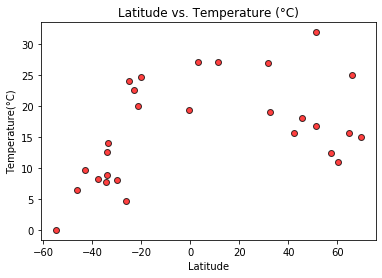

In [60]:
plt.scatter(weather_df["Latitude"], weather_df["Temperate (°C)"],marker="o", facecolors="red", edgecolors="black", alpha=0.75 )
plt.xlabel("Latitude")
plt.title("Latitude vs. Temperature (°C)")
plt.ylabel("Temperature(°C)")

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity')

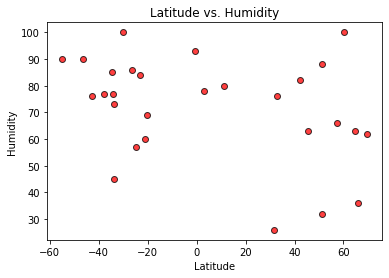

In [61]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"],marker="o", facecolors="red", edgecolors="black", alpha=0.75 )
plt.xlabel("Latitude")
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness')

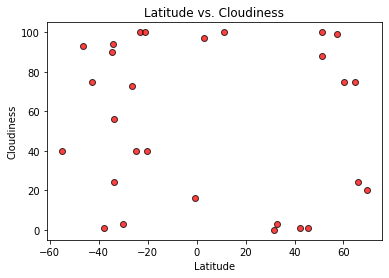

In [62]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"],marker="o", facecolors="red", edgecolors="black", alpha=0.75 )
plt.xlabel("Latitude")
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'windspeed')

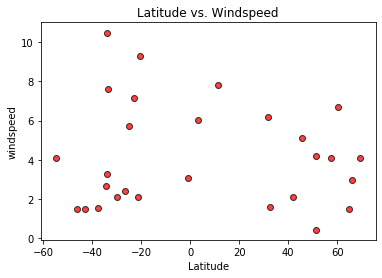

In [64]:
plt.scatter(weather_df["Latitude"], weather_df["windspeed"],marker="o", facecolors="red", edgecolors="black", alpha=0.75 )
plt.xlabel("Latitude")
plt.title("Latitude vs. Windspeed")
plt.ylabel("windspeed")

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [68]:
# Create Northern and Southern Hemisphere DataFrames
Northern_Hem_weather = weather_df.loc[weather_df["Latitude"] > 0]

Southern_Hem_weather= weather_df.loc[weather_df["Latitude"] < 0]


,City,Latitude,Longitude,Country,Temperate (°C),Min Temp(°C),Max Temp(°C),Humidity,Cloudiness,windspeed
0,Kruisfontein,-34.00,24.73,ZA,8.88,8.88,8.88,77,94,10.48
2,Grenfell,-33.90,148.17,AU,12.53,12.53,12.53,73,24,3.29
3,Lebu,-37.62,-73.65,CL,8.27,8.27,8.27,77,1,1.57
5,Coquimbo,-29.95,-71.34,CL,8.00,8.00,8.00,100,3,2.10
6,Puerto Ayora,-0.74,-90.35,EC,19.44,19.44,19.44,93,16,3.08
7,Rikitea,-23.12,-134.97,PF,22.66,22.66,22.66,84,100,7.15
8,Bethanien,-26.50,17.16,NaN,4.74,4.74,4.74,86,73,2.44
9,Hobart,-42.88,147.33,AU,9.74,9.00,10.00,76,75,1.50
11,Bambous Virieux,-20.34,57.76,MU,24.74,24.44,25.00,69,40,9.30
12,Busselton,-33.65,115.33,AU,14.07,11.67,16.11,45,56,7.63


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0, 0.5, 'Max Temperature (°C)')

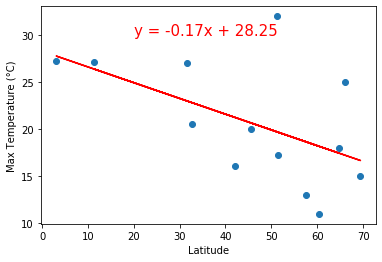

In [78]:
#define x and y axis
Nor_max_temp= Northern_Hem_weather["Max Temp(°C)"]
Nor_Lat=Northern_Hem_weather["Latitude"]

#define slope 
(slope, intercept, rvalue, pvalue, stderr) = linregress(Nor_Lat, Nor_max_temp)
regress_values = Nor_Lat * slope + intercept

#plot
plt.scatter(Nor_Lat, Nor_max_temp)

#add lineregression 
plt.plot(Nor_Lat,regress_values,"r-")

#determine line equation and plot it 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,30),fontsize=15,color="red")

#label axis 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("Max. Temperature vs Latitude")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(0.5, 1.0, 'Max. Temperature vs Latitude')

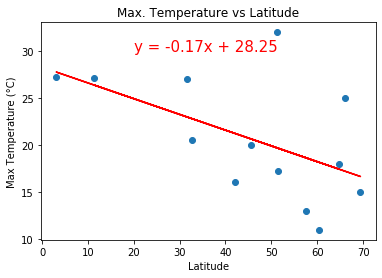

In [79]:
#define x and y axis
Nor_max_temp= Northern_Hem_weather["Max Temp(°C)"]
Nor_Lat=Northern_Hem_weather["Latitude"]

#define slope 
(slope, intercept, rvalue, pvalue, stderr) = linregress(Nor_Lat, Nor_max_temp)
regress_values = Nor_Lat * slope + intercept

#plot
plt.scatter(Nor_Lat, Nor_max_temp)

#add lineregression 
plt.plot(Nor_Lat,regress_values,"r-")

#determine line equation and plot it 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,30),fontsize=15,color="red")

#label axis 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("Max. Temperature vs Latitude")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression